# NUTRITION WEIGHT ACTIVITY
* import
* analze
* 

In [1]:
# import packages

import numpy as np
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 1000
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
# comment out line below in VSCode
%matplotlib inline

# VSCode requires print() for all displays

In [2]:
# explore weights
dfw = pd.read_csv('Weights2019-02-16 (6621).csv')


In [3]:
dfw.head()

,Date,Weight
0,02/16/2019,207.0
1,02/15/2019,202.4
2,02/14/2019,202.2
3,02/13/2019,202.2
4,02/11/2019,204.4


In [18]:
dfw.tail();

In [4]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
Date      169 non-null object
Weight    169 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


### Need to make Date as datetime format, reverse order, and index

In [21]:
# as datetime
dfw['Date'] = pd.to_datetime(dfw['Date'])

In [22]:
# check
dfw.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
Date      169 non-null datetime64[ns]
Weight    169 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


In [23]:
# set as index
dfw.set_index(dfw['Date'], inplace = True)


In [24]:
# check
dfw.head();

In [25]:
# drop Excess date columns
dfw.drop(['Date'], axis=1, inplace=True)

In [26]:
dfw1 = dfw.iloc[::-1]

In [27]:
dfw1.drop(dfw1.index[:10], inplace=True)

In [29]:
print(dfw1.head())
print(dfw1.tail())

            Weight
Date              
2018-07-28   233.2
2018-07-29   232.4
2018-07-30   231.8
2018-07-31   232.0
2018-08-04   231.8
            Weight
Date              
2019-02-11   204.4
2019-02-13   202.2
2019-02-14   202.2
2019-02-15   202.4
2019-02-16   207.0


/Users/artrodriguez/.local/share/virtualenvs/nutrition_and_activity-9buAQDj7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


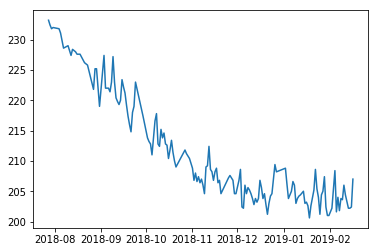

In [30]:
plt.plot(dfw1['Weight'])
plt.show()

In [83]:
# import nutrition

import os

os.chdir('/Users/artrodriguez/Desktop/all_projects/nutrition_and_activity/nutrition')

#dfs = [pd.read_csv(f, index_col=[0], parse_dates=[0], header=None)
#        for f in os.listdir(os.getcwd()) if f.endswith('csv')]

dfs = [pd.read_csv(f, header=None)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=0, join='inner').sort_index()

In [84]:
finaldf.sort_index(inplace=True, ascending=True);

In [85]:
finaldf.head(35);

In [86]:
finaldf.columns = finaldf.iloc[1]

finaldf.head(35);

In [87]:
finaldf.drop(finaldf.index[:29], inplace=True)

In [88]:
finaldf.head(30);
finaldf.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3343 entries, 1 to 145
Data columns (total 14 columns):
Date                 3343 non-null object
Name                 3343 non-null object
Type                 3343 non-null object
Quantity             3343 non-null object
Units                3343 non-null object
Calories             3343 non-null object
Fat (g)              2887 non-null object
Protein (g)          2881 non-null object
Carbohydrates (g)    2902 non-null object
Saturated Fat (g)    2711 non-null object
Sugars (g)           2699 non-null object
Fiber (g)            2725 non-null object
Cholesterol (mg)     2653 non-null object
Sodium (mg)          2766 non-null object
dtypes: object(14)
memory usage: 391.8+ KB


In [89]:
numeric_convert = ['Quantity',
                  'Calories',
                  'Fat (g)',
                  'Protein (g)',
                  'Carbohydrates (g)',
                  'Saturated Fat (g)',
                  'Sugars (g)',
                  'Fiber (g)',
                  'Cholesterol (mg)',
                  'Sodium (mg)'
                  ]

finaldf[numeric_convert] = finaldf[numeric_convert].apply(pd.to_numeric, errors='coerce')

#convert = ['API #', 'Gas', 'DT', 'Water', 'CP', 'Choke', 'TP', 'SLP']
#df[convert] = df[convert].apply(pd.to_numeric, errors='coerce')

In [90]:
# as datetime
finaldf['Date'] = pd.to_datetime(finaldf['Date'])
# set as index
finaldf.set_index(finaldf['Date'], inplace = True)
# drop Excess date columns
finaldf.drop(['Date'], axis=1, inplace=True)

In [91]:
finaldf.head(30);

In [92]:
finaldf.sort_index(inplace=True, ascending=True);

In [93]:
finaldf.head(10);

In [94]:
finaldf.drop(pd.Timestamp('2018-07-23'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-24'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-25'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-26'), inplace=True)
finaldf.head(25);

In [95]:
finaldf.tail(10);

In [96]:
finaldf1 = finaldf.groupby([pd.Grouper(freq='D'), 'Type']).sum()

# AVERAGE BY STOP FOR 7 DAY
#df_daily_routeswa = df.groupby([pd.Grouper(freq='D'), 'Stop']).sum() # Groups numeric columns by Day then Area, have to use some sort of aggregation
#ddr_gaswa = df_daily_routeswa.unstack('Stop')['Gas'] # Make column names the areas and filter out API / DT
#ddr_gaswa['Total'] = ddr_gaswa.sum(axis=1) # Add a total column by adding across rows
#t181202wa = ddr_gaswa.T

0                        Quantity  Calories  Fat (g)  Protein (g)  Carbohydrates (g)  Saturated Fat (g)  Sugars (g)  Fiber (g)  Cholesterol (mg)  Sodium (mg)
Date       Type                                                                                                                                              
2018-07-27 Breakfast       69.000   610.000    31.50        47.00              37.00               7.00       28.00       4.00            520.00       560.00
           Dinner          17.625  1345.000    72.01        99.47              74.02              25.18       12.55       8.71            388.51      2573.21
           Exercise       183.000  1325.038     0.00         0.00               0.00               0.00        0.00       0.00              0.00         0.00
           Lunch           12.000   910.000    61.00        26.00              65.00              15.00        9.00       9.00             80.00      2170.00
           Morning Nosh     0.500    45.000     1.50         1.00               7.00               0.50        3.50       0.00            100.00        32.50

In [98]:
finaldf2 = finaldf1.unstack('Type')
finaldf2.head()

0                Quantity                                                                          Calories                                                                            Fat (g)                                                                     Protein (g)                                                                   Carbohydrates (g)                                                                   Saturated Fat (g)                                                                      Sugars (g)                                                                      Fiber (g)                                                                  Cholesterol (mg)                                                                       Sodium (mg)                                                                     
Type       Afternoon Nosh Ale/Wine 1 Breakfast Dessert  Dinner Exercise   Lunch Morning Nosh Afternoon Nosh Ale/Wine 1 Breakfast Dessert  Dinner  Exercise   Lunch Morning Nosh Afternoon Nosh Ale/Wine 1 Breakfast Dessert Dinner Exercise  Lunch Morning Nosh Afternoon Nosh Ale/Wine 1 Breakfast Dessert  Dinner Exercise  Lunch Morning Nosh    Afternoon Nosh Ale/Wine 1 Breakfast Dessert  Dinner Exercise  Lunch Morning Nosh    Afternoon Nosh Ale/Wine 1 Breakfast Dessert Dinner Exercise  Lunch Morning Nosh Afternoon Nosh Ale/Wine 1 Breakfast Dessert Dinner Exercise Lunch Morning Nosh Afternoon Nosh Ale/Wine 1 Breakfast Dessert Dinner Exercise  Lunch Morning Nosh   Afternoon Nosh Ale/Wine 1 Breakfast Dessert  Dinner Exercise   Lunch Morning Nosh Afternoon Nosh Ale/Wine 1 Breakfast Dessert   Dinner Exercise    Lunch Morning Nosh
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
2018-07-27            NaN        NaN      69.0     NaN  17.625    183.0  12.000        0.500            NaN        NaN     610.0     NaN  1345.0  1325.038   910.0         45.0            NaN        NaN     31.50     NaN  72.01      0.0  61.00         1.50            NaN        NaN     47.00     NaN   99.47      0.0  26.00         1.00               NaN        NaN     37.00     NaN   74.02      0.0  65.00         7.00               NaN        NaN       7.0     NaN  25.18      0.0  15.00         0.50            NaN        NaN     28.00     NaN  12.55      0.0  9.00         3.50            NaN        NaN      4.00     NaN   8.71      0.0   9.00         0.00              NaN        NaN     520.0     NaN  388.51      0.0   80.00       100.00            NaN        NaN    560.00     NaN  2573.21      0.0  2170.00        32.50
2018-07-28            NaN        NaN      35.0    1.00  37.750     63.0     NaN        1.000            NaN        NaN     340.0   180.0  2224.0  1062.000     NaN        100.0            NaN        NaN     25.00    6.00  79.77      0.0    NaN         6.00            NaN        NaN     28.00    5.00  114.59      0.0    NaN         1.00               NaN        NaN      1.00   27.00  152.33      0.0    NaN        13.00               NaN        NaN       7.5    5.00  20.79      0.0    NaN         1.50            NaN        NaN      1.00   21.00  34.22      0.0   NaN         0.00            NaN        NaN      0.00    0.00  23.70      0.0    NaN         1.00              